In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
import urllib.request as REQ

import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False


In [2]:
kurl='https://www.weather.go.kr/weather/forecast/mid-term-rss3.jsp?stnId=109'

In [3]:
response = REQ.urlopen(kurl)
rss = BeautifulSoup( response,'html.parser')
rss

<?xml version="1.0" encoding="utf-8" ?>
<rss version="2.0">
<channel>
<title>기상청 육상 중기예보</title>
<link/>http://www.kma.go.kr/weather/forecast/mid-term_02.jsp
<description>기상청 날씨 웹서비스</description>
<language>ko</language>
<generator>기상청</generator>
<pubdate>2021년 09월 30일 (목)요일 06:00</pubdate>
<item>
<author>기상청</author>
<category>육상중기예보</category>
<title>서울,경기도 육상 중기예보 - 2021년 09월 30일 (목)요일 06:00 발표</title>
<link/>http://www.kma.go.kr/weather/forecast/mid-term_02.jsp
<guid>http://www.kma.go.kr/weather/forecast/mid-term_02.jsp</guid>
<description>
<header>
<title>서울,경기도 육상중기예보</title>
<tm>202109300600</tm>
<wf><![CDATA[○ (강수) 10월 5일(화) 오후부터 7일(목) 오전 사이 비가 내리겠습니다.<br />○ (기온) 이번 예보기간 아침최저기온은 15~21도로 어제(29일, 아침최저기온 19~21도)와 비슷하거나 조금 낮겠으며,<br />          낮최고기온은 23~27도로 어제(29일, 낮최고기온 21~23도)보다 높겠습니다.<br />○ (해상) 서해중부해상의 물결은 0.5~2.0m로 일겠습니다.<br />○ (주말전망) 10월 2일(토)은 흐리다가 오후부터 차차 맑아지겠고, 10월 3일(일)은 구름많겠습니다. 아침 기온은 13~19도, 낮 기온은 24~27도가 되겠습니다.]]></wf>
</header>
<body>
<location wl_ver="3">
<prov

In [4]:
kdata = []
for location in rss.select('location'):
    for data in location.select('data'):
        kdata.append( {'도시':location.city.text,
                      '날짜':data.tmef.string,
                      '날씨':data.wf.string,
                      '최저':int(data.tmn.string),
                      '최고':int(data.tmx.string)})


In [26]:
kdata

[{'도시': '서울', '날짜': '2021-10-02 00:00', '날씨': '구름많음', '최저': 17, '최고': 25},
 {'도시': '서울', '날짜': '2021-10-02 12:00', '날씨': '맑음', '최저': 17, '최고': 25},
 {'도시': '서울', '날짜': '2021-10-03 00:00', '날씨': '구름많음', '최저': 18, '최고': 27},
 {'도시': '서울', '날짜': '2021-10-03 12:00', '날씨': '구름많음', '최저': 18, '최고': 27},
 {'도시': '서울', '날짜': '2021-10-04 00:00', '날씨': '흐림', '최저': 18, '최고': 26},
 {'도시': '서울', '날짜': '2021-10-04 12:00', '날씨': '흐림', '최저': 18, '최고': 26},
 {'도시': '서울', '날짜': '2021-10-05 00:00', '날씨': '흐림', '최저': 19, '최고': 26},
 {'도시': '서울', '날짜': '2021-10-05 12:00', '날씨': '흐림', '최저': 19, '최고': 26},
 {'도시': '서울', '날짜': '2021-10-06 00:00', '날씨': '흐리고 비', '최저': 19, '최고': 26},
 {'도시': '서울', '날짜': '2021-10-06 12:00', '날씨': '흐리고 비', '최저': 19, '최고': 26},
 {'도시': '서울', '날짜': '2021-10-07 00:00', '날씨': '흐리고 비', '최저': 18, '최고': 24},
 {'도시': '서울', '날짜': '2021-10-08 00:00', '날씨': '흐림', '최저': 16, '최고': 23},
 {'도시': '서울', '날짜': '2021-10-09 00:00', '날씨': '구름많음', '최저': 15, '최고': 23},
 {'도시': '인천', '날짜': '2021-10-02 00

In [5]:
kdf = pd.DataFrame(kdata)
kdf.set_index(['도시','날짜'],inplace=True) # 멀티인덱스
kdf

날씨  최저  최고
도시 날짜                             
서울 2021-10-03 00:00   구름많음  18  27
   2021-10-03 12:00   구름많음  18  27
   2021-10-04 00:00     흐림  20  26
   2021-10-04 12:00     흐림  20  26
   2021-10-05 00:00     흐림  20  26
...                    ...  ..  ..
여주 2021-10-07 00:00  흐리고 비  16  23
   2021-10-07 12:00     흐림  16  23
   2021-10-08 00:00     흐림  16  23
   2021-10-09 00:00     흐림  16  23
   2021-10-10 00:00     흐림  14  23

[455 rows x 3 columns]

In [28]:
2. 도시별 최고, 최저기온 평균을 구하시요.

SyntaxError: invalid syntax (<ipython-input-28-daef583ea672>, line 1)

In [29]:
kdf.pivot_table(index='도시')

,최고,최저
도시,,
가평,24.461538,14.307692
강화,24.384615,17.076923
고양,25.538462,16.769231
과천,25.230769,16.384615
광명,25.230769,19.230769
광주,24.307692,16.384615
구리,25.461538,17.461538
군포,25.076923,18.384615
김포,25.230769,17.769231


In [ ]:
3. '비'가 오는 도시 날짜 날씨를 구하시요(비 글자가 들어있는)

In [77]:
kdf[kdf['날씨'].str.contains('비')]

날씨  최저  최고
도시 날짜                             
서울 2021-10-06 00:00  흐리고 비  19  26
   2021-10-06 12:00  흐리고 비  19  26
   2021-10-07 00:00  흐리고 비  18  24
인천 2021-10-06 00:00  흐리고 비  19  24
   2021-10-06 12:00  흐리고 비  19  24
...                    ...  ..  ..
광주 2021-10-06 12:00  흐리고 비  18  24
   2021-10-07 00:00  흐리고 비  17  23
여주 2021-10-06 00:00  흐리고 비  17  24
   2021-10-06 12:00  흐리고 비  17  24
   2021-10-07 00:00  흐리고 비  17  23

[105 rows x 3 columns]

In [ ]:
4. 최저기온이 가장낮은 도시, 날짜, 최저기온을 구하시요

In [83]:
kdf[kdf['최저']==kdf['최저'].min()]

,,날씨,최저,최고
도시,날짜,,,
양주,2021-10-09 00:00,구름많음,11,23
포천,2021-10-09 00:00,구름많음,11,22
가평,2021-10-09 00:00,구름많음,11,23


In [ ]:
5. 도시를 입력받아 해당도시 데이터를 구하시요
도시입력:
날짜  날씨 최고 	최저
....

In [85]:
city = input('도시입력: ')
print(kdf.loc['서울'])

도시입력: 서울
                     날씨  최저  최고
날짜                             
2021-10-02 00:00   구름많음  17  25
2021-10-02 12:00     맑음  17  25
2021-10-03 00:00   구름많음  18  27
2021-10-03 12:00   구름많음  18  27
2021-10-04 00:00     흐림  18  26
2021-10-04 12:00     흐림  18  26
2021-10-05 00:00     흐림  19  26
2021-10-05 12:00     흐림  19  26
2021-10-06 00:00  흐리고 비  19  26
2021-10-06 12:00  흐리고 비  19  26
2021-10-07 00:00  흐리고 비  18  24
2021-10-08 00:00     흐림  16  23
2021-10-09 00:00   구름많음  15  23


In [ ]:
6. 느낌 컬럼을 추가하고 최고기온이 
-27 도 이상이면:더움
-23~26 면: 보통
나머지 : 약간쌀쌀
표시하시요

In [116]:
def ff(f) :
    if f >= 27:
        return "더움"
    elif 23 <= f <=26:
        return "보통"
    else :
        return "약간 쌀쌀"
    

In [119]:
kdf['느낌']= kdf['최고'].apply(ff)
kdf

날씨  최저  최고  일교차     느낌
도시 날짜                                         
서울 2021-10-02 00:00   구름많음  17  25    8     보통
   2021-10-02 12:00     맑음  17  25    8     보통
   2021-10-03 00:00   구름많음  18  27    9     더움
   2021-10-03 12:00   구름많음  18  27    9     더움
   2021-10-04 00:00     흐림  18  26    8     보통
...                    ...  ..  ..  ...    ...
여주 2021-10-06 00:00  흐리고 비  17  24    7     보통
   2021-10-06 12:00  흐리고 비  17  24    7     보통
   2021-10-07 00:00  흐리고 비  17  23    6     보통
   2021-10-08 00:00     흐림  15  22    7  약간 쌀쌀
   2021-10-09 00:00   구름많음  12  22   10  약간 쌀쌀

[455 rows x 5 columns]

In [ ]:

7. 서울지역의 날짜별 최고 최저기온을 바차트로
그리시요

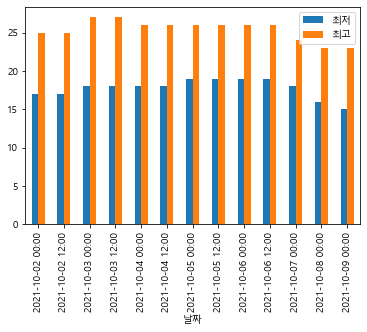

In [91]:
kdf.loc['서울'].plot(kind='bar')
plt.show()

In [ ]:
8. 여주지역 최저기온이 13 도 이하인데이터를 구하시요

In [96]:
kdf.loc['여주'][kdf.loc['여주']['최저']<=13]

,날씨,최저,최고
날짜,,,
2021-10-09 00:00,구름많음,12,22


In [ ]:
9. 여주지역 전체 최고기온 중 최고기온이 26 도 이상이
차지하는비율을 구하시요.
(예를들어  출력결과:26도이상 15% )

In [7]:
y = (kdf.loc['여주']['최고'][kdf.loc['여주']['최고']>=26].count()/kdf.loc['여주']['최고'].count())*100
y
print('26도 이상',y,'%')

26도 이상 15.384615384615385 %


In [ ]:
10. 일교차 컬럼을 추가하고,최고기온과 최저기온의 
차이가 가장높은 도시,날짜,최저,최고,일교차를 구하시요

In [8]:
kdf['일교차'] = kdf['최고']-kdf['최저']
kdf

날씨  최저  최고  일교차
도시 날짜                                  
서울 2021-10-03 00:00   구름많음  18  27    9
   2021-10-03 12:00   구름많음  18  27    9
   2021-10-04 00:00     흐림  20  26    6
   2021-10-04 12:00     흐림  20  26    6
   2021-10-05 00:00     흐림  20  26    6
...                    ...  ..  ..  ...
여주 2021-10-07 00:00  흐리고 비  16  23    7
   2021-10-07 12:00     흐림  16  23    7
   2021-10-08 00:00     흐림  16  23    7
   2021-10-09 00:00     흐림  16  23    7
   2021-10-10 00:00     흐림  14  23    9

[455 rows x 4 columns]

In [9]:
kdf[kdf['일교차']==kdf['일교차'].max()]

날씨  최저  최고  일교차
도시 날짜                                 
양주 2021-10-03 00:00  구름많음  14  27   13
   2021-10-03 12:00  구름많음  14  27   13
연천 2021-10-03 00:00  구름많음  13  26   13
   2021-10-03 12:00  구름많음  13  26   13
가평 2021-10-03 00:00  구름많음  14  27   13
   2021-10-03 12:00  구름많음  14  27   13